# **Question 3 - Part B**

**Probabilistic Supervised Learning - Naive Bayes(Binomial):** Create a dataset from the sample given to you(e.g. “Titanic, Play Tennis Probability”, “Shopper Buying Probability” etc.). Perform the necessary pre-processing steps such as encoding. Train the model using Naive Bayes Classifier for Binomial predictions. Give new test data and predict the classification output. Handcode the classification probability and compare with the model output. Analyze and write the inference.

[Kagle Titanic dataset](https://www.kaggle.com/datasets/heptapod/titanic/download?datasetVersionNumber=1)


In [1]:
import pandas as pd
#Import dataset
df = pd.read_csv('titanic.csv')
df.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


In [2]:
#Drop extra things
df.dropna()
df.drop(['Name',],inplace=True,axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [3]:
#Encoding text to numbers
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder = LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
#Using scaler to standardize the mean and variance
scaler = StandardScaler()
df[['Fare','Age']] = scaler.fit_transform(df[['Fare','Age']])
df.head(3)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,-0.529366,1,0,-0.503586
1,1,1,0,0.604265,1,0,0.783412
2,1,3,0,-0.245958,0,0,-0.490020


In [4]:
#Training model
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
#Train test split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.2)
model =BernoulliNB()
model.fit(x_train,y_train)
#Listing classes
model.classes_


array([0, 1], dtype=int64)

In [5]:
#Prediction and calculate accuracy
y_pred=model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
acc =  accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)

print("Accuracy : ",acc,"\nF1 Score : ",f1)

Accuracy :  0.7584269662921348 
F1 Score :  0.6559999999999999


(178,)


<AxesSubplot: >

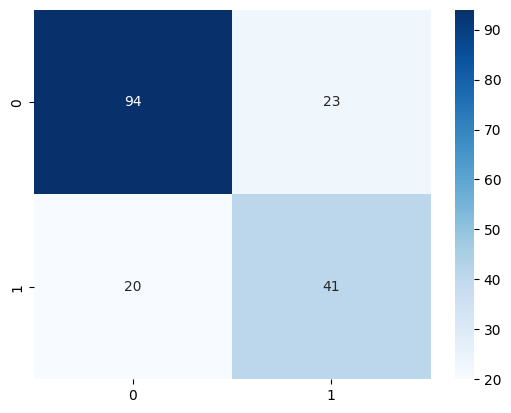

In [6]:
#Draw confusion matrix
print(y_test.shape)
labels = [0,1]
cm=confusion_matrix(y_pred,y_test,labels=labels)

import seaborn as sns
sns.heatmap(cm,annot=True,cmap='Blues')


AUC 0.7633634868421053
ROC curve


<AxesSubplot: >

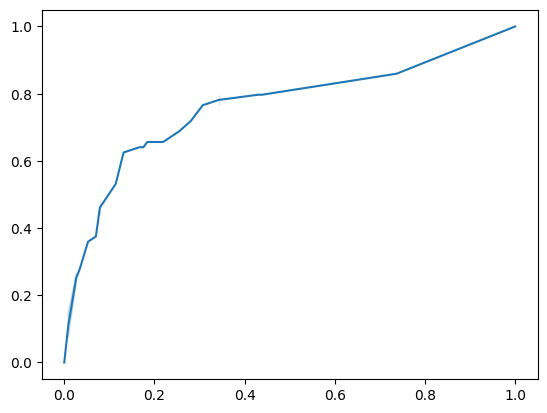

In [7]:
from sklearn.metrics import roc_curve,auc
prob=model.predict_proba(x_test)
prob=prob[:,1]
fpr,tpr,_=roc_curve(y_test,prob)
print("AUC",auc(fpr,tpr))
print("ROC curve")
sns.lineplot(x=fpr,y=tpr)